In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('Customer.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


array([[<AxesSubplot:title={'center':'CustomerID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Annual Income (k$)'}>,
        <AxesSubplot:title={'center':'Spending Score (1-100)'}>]],
      dtype=object)

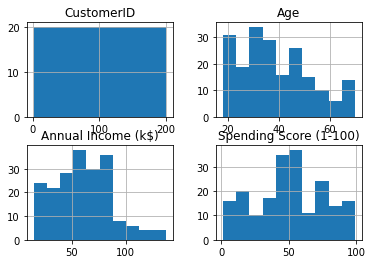

In [3]:
data.hist()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(['Male', 'Female'])
data['Gender'] = encoder.transform(data['Gender'])
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [7]:
def plot_age_income():
    age_income_ax = data[data['Gender'] == 1].plot(kind= 'scatter', x='Age', y='Annual Income (k$)', s='Spending Score (1-100)', label='Male', color='blue', alpha=0.5)
    data[data['Gender'] == 0].plot(kind= 'scatter', x='Age', y='Annual Income (k$)', s='Spending Score (1-100)', label='Female', color='red', alpha=0.5, ax=age_income_ax)
    plt.xlabel('Age')
    plt.ylabel('Annual Income (k$)')
    plt.show()

In [8]:
def plot_age_score():
    age_score_ax = data[data['Gender'] == 1].plot(kind= 'scatter', x='Age', y='Spending Score (1-100)', s='Annual Income (k$)', label='Male', color='blue', alpha=0.5)
    data[data['Gender'] == 0].plot(kind= 'scatter', x='Age', y='Spending Score (1-100)', s='Annual Income (k$)', label='Female', color='red', alpha=0.5, ax=age_score_ax)
    plt.xlabel('Age')
    plt.ylabel('Spending Score (1-100)')
    plt.show()

In [9]:
def plot(method_name, set_clusters):
    print("Plot AGE-SCORE before clustering")
    plot_age_score()
    for cluster in set_clusters:
        subset = data[data[method_name] == cluster] # a data frame from people in the given cluster
        plt.scatter(subset['Age'], subset['Spending Score (1-100)'], label='cluster'+str(cluster), s=subset['Annual Income (k$)'], alpha=0.5)
        plt.legend()
        plt.xlabel('Age')
        plt.ylabel('Spending Score (1-100)')
    plt.show()
    print("Plot AGE-INCOME before clustering")
    plot_age_income()
    for cluster in set_clusters:
        subset = data[data[method_name] == cluster]
        if cluster == -1:
            plt.scatter(subset['Age'], subset['Annual Income (k$)'], label='cluster'+str(cluster), s=subset['Spending Score (1-100)'], alpha=0.5, color='black')
        else:
            plt.scatter(subset['Age'], subset['Annual Income (k$)'], label='cluster'+str(cluster), s=subset['Spending Score (1-100)'], alpha=0.5)
        plt.legend()
        plt.xlabel('Age')
        plt.ylabel('Annual Income (k$)')
    plt.show()

In [10]:
from mpl_toolkits.mplot3d import Axes3D as axes3d
def plot_3d(method_name, set_clusters):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111, projection='3d')
    for cluster in set_clusters:
        subset = data[data[method_name] == cluster]
        if cluster == -1:
            ax.scatter(subset['Age'], subset['Annual Income (k$)'], subset['Spending Score (1-100)'], label='cluster'+str(cluster), alpha=0.5, color='black', s= 35)
        else:
            ax.scatter(subset['Age'], subset['Annual Income (k$)'], subset['Spending Score (1-100)'], label='cluster'+str(cluster), alpha=0.5, s= 35)
    ax.legend()
    plt.show()

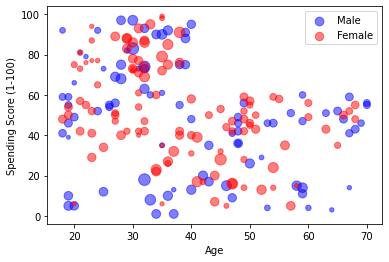

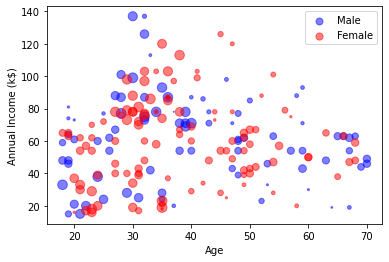

In [11]:
plot_age_score()
plot_age_income()

In [12]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [13]:
df = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X = df.values
X[0:5]

array([[ 1, 19, 15, 39],
       [ 1, 21, 15, 81],
       [ 0, 20, 16,  6],
       [ 0, 23, 16, 77],
       [ 0, 31, 17, 40]], dtype=int64)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

- ### KMEANS

0.2518152915788437
0.25951265087431563
0.3012323168801352
0.31664426428574227
0.33432134408851794
0.35736912186265696
0.38733199737864654
0.4027213674010831
0.42076374869477745
0.42736333320620007
0.4223549168129257
0.4264161284151986
0.4311854312990339
0.4070032354859538
0.4222077698710585
0.403496859406213
0.4114128158237192
0.40155748740555003
0.40207932776539623


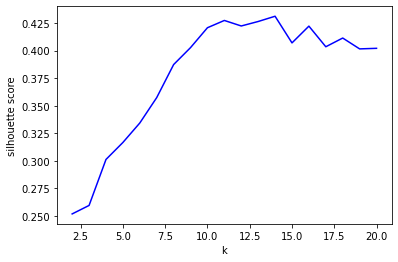

Max silhouette score is: 0.4311854312990339
The best K is: 14


In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
max_k = 20
silhouette_scores = []
kmeans_models = []
for i in range(2, max_k + 1):
    kmeans = KMeans(init='k-means++', n_clusters=i, n_init=20)
    kmeans.fit(X)
    s_score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(s_score)
    kmeans_models.append(kmeans)
    print(s_score)

plt.plot(np.arange(2, len(silhouette_scores) + 2), silhouette_scores, color='b')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.show()
max_silhouette_scores = max(silhouette_scores)
best_index = silhouette_scores.index(max_silhouette_scores)
best_kmeans = kmeans_models[best_index]
print("Max silhouette score is:", max_silhouette_scores)
print("The best K is:", best_index + 2)

In [16]:
data['KMEANS_Clusters'] = best_kmeans.labels_
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),KMEANS_Clusters
0,1,1,19,15,39,11
1,2,1,21,15,81,11
2,3,0,20,16,6,13
3,4,0,23,16,77,9
4,5,0,31,17,40,13


In [17]:
data.groupby('KMEANS_Clusters').mean()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
KMEANS_Clusters,,,,,
0,157.000000,1.0,48.636364,82.272727,19.181818
1,163.333333,0.0,32.190476,86.047619,81.666667
2,83.923077,0.0,54.153846,54.230769,48.961538
3,86.545455,1.0,22.636364,55.545455,53.272727
4,92.400000,0.0,27.960000,57.360000,47.120000
5,19.666667,1.0,55.500000,24.000000,11.166667
6,160.444444,1.0,33.277778,87.111111,82.666667
7,162.555556,1.0,28.333333,88.666667,7.777778
8,81.750000,1.0,65.000000,53.583333,50.750000


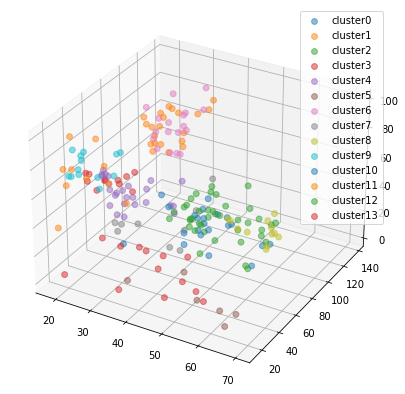

Plot AGE-SCORE before clustering


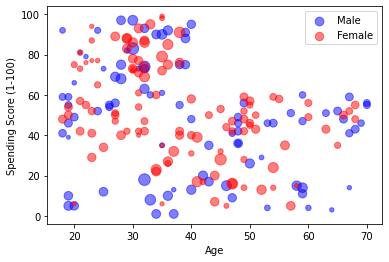

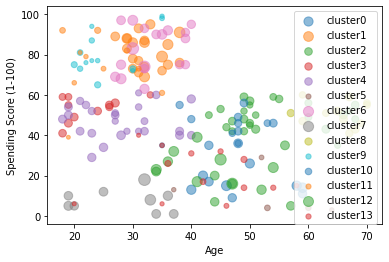

Plot AGE-INCOME before clustering


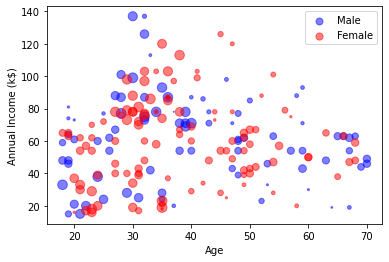

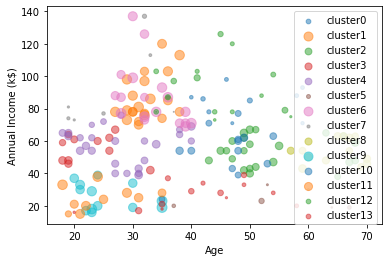

In [18]:
plot_3d("KMEANS_Clusters", set(best_kmeans.labels_))
plot("KMEANS_Clusters", set(best_kmeans.labels_))

- ### Hierarchical

In [19]:
from sklearn.metrics import pairwise_distances
distance_matrix = pairwise_distances(X, metric="euclidean")

In [20]:
import pylab
from scipy.cluster import hierarchy

Z = hierarchy.linkage(distance_matrix, 'complete')

C:\Users\rohani.sara\AppData\Local\Temp\ipykernel_13572\3378631557.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(distance_matrix, 'complete')


In [21]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
data['HIERARCHICAL_Clusters'] = clusters
set_clusters = set(clusters)
print(set_clusters)
data.head()

{1, 2, 3, 4, 5}


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),KMEANS_Clusters,HIERARCHICAL_Clusters
0,1,1,19,15,39,11,2
1,2,1,21,15,81,11,2
2,3,0,20,16,6,13,4
3,4,0,23,16,77,9,2
4,5,0,31,17,40,13,1


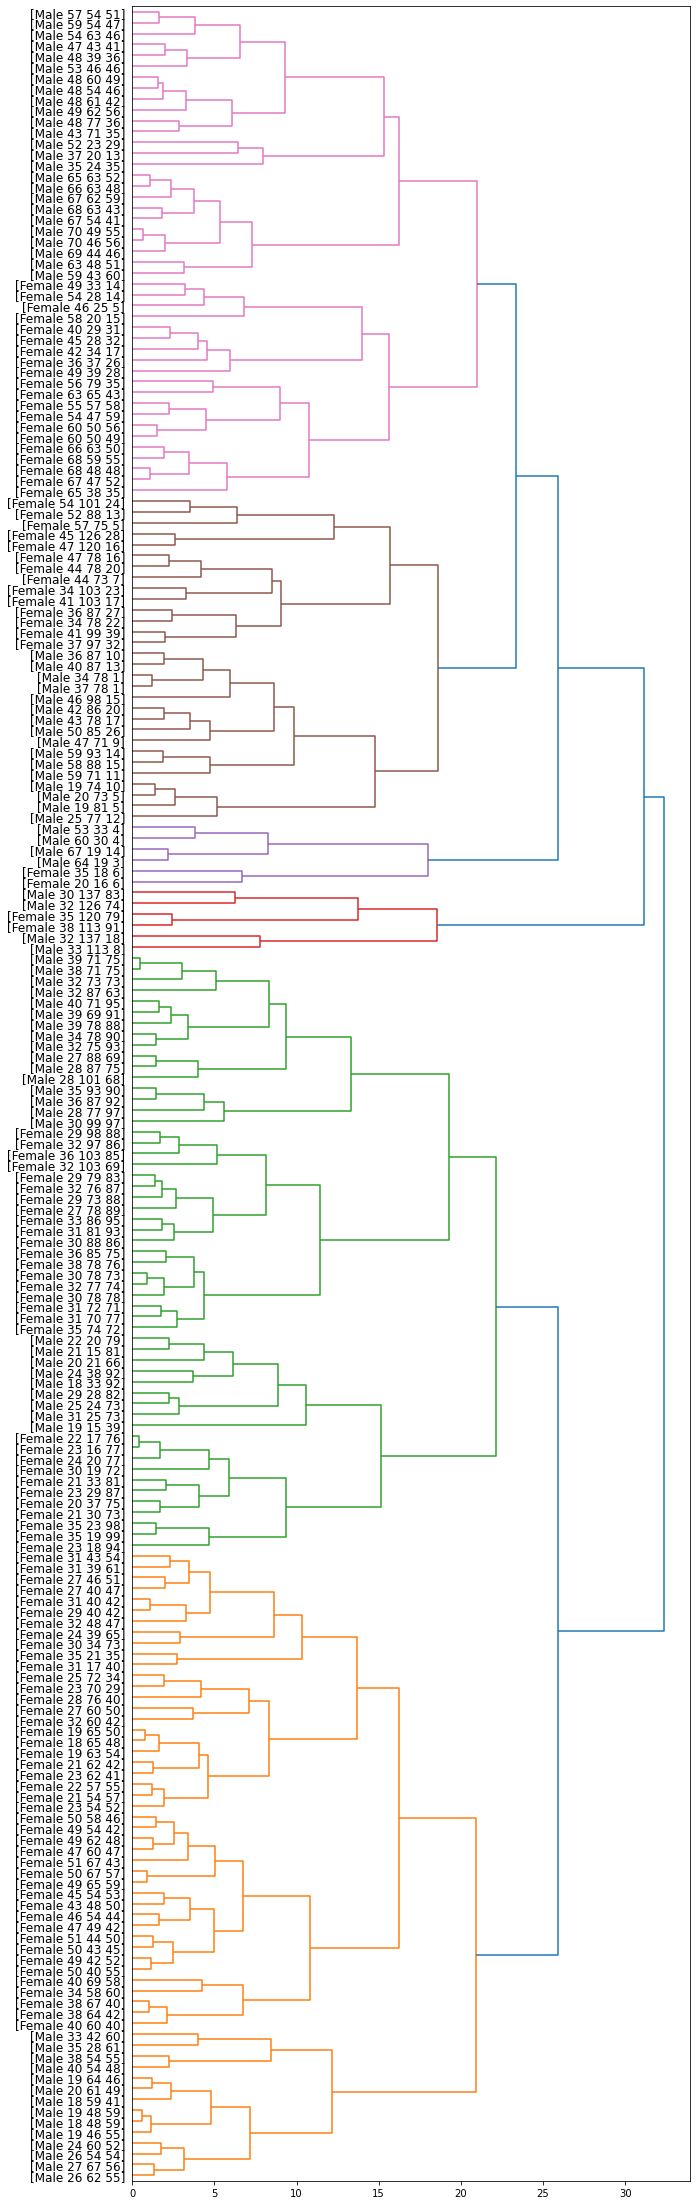

In [22]:
fig = pylab.figure(figsize=(10,40))
def llf(id):
    if data['Gender'][id] == 1:
        gender = "Male"
    if data['Gender'][id] == 0:
        gender = "Female"
    return '[%s %s %s %s]' % (gender, data['Age'][id], data['Annual Income (k$)'][id], data['Spending Score (1-100)'][id])
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

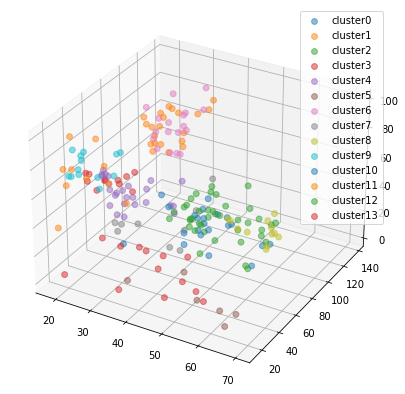

Plot AGE-SCORE before clustering


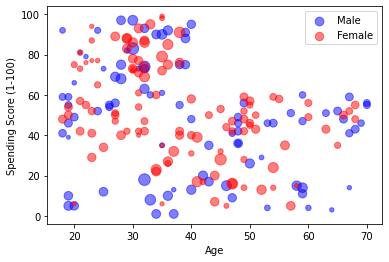

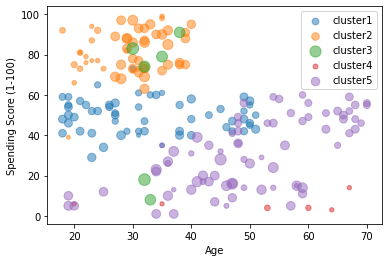

Plot AGE-INCOME before clustering


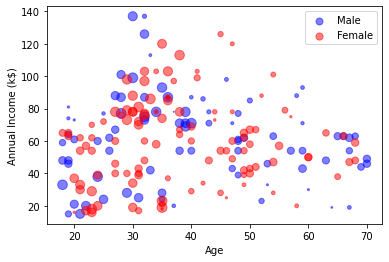

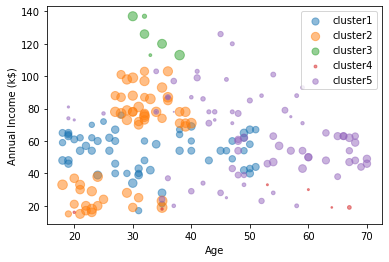

In [23]:
plot_3d("KMEANS_Clusters", set(best_kmeans.labels_))
plot("HIERARCHICAL_Clusters", set_clusters)

- ### DBSCAN

In [24]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=3)
dbscan.fit(X)
labels = dbscan.labels_
data['DBSCAN_Clusters'] = labels
labels

array([-1,  1, -1,  0,  2,  0, -1, -1, -1,  0, -1, -1,  3,  0, -1,  1,  2,
        1, -1, -1, -1,  1, -1,  1,  3,  1,  2, -1,  2,  0, -1,  0, -1, -1,
        3,  0, -1, -1,  2,  0, -1, -1,  6,  5, -1,  0,  4,  5,  5,  5,  4,
       -1,  5,  6,  4,  6,  4,  6,  5,  6,  6,  7,  8,  4,  6,  7,  4,  8,
        7,  5,  6,  4,  4,  4,  6,  9,  4, -1,  5,  4,  6, -1,  6,  4,  5,
        6,  4,  5, -1,  4,  8,  9,  6,  5,  5,  9,  4,  5,  6,  9,  5,  4,
        6,  9,  6,  5,  8,  6,  6,  6,  6,  5,  5,  9,  5,  5,  8,  4,  4,
        4,  9,  5, -1, 10,  5, 11, -1, 10, -1, 12, -1, 12,  5, 11, 13, 11,
       15, 12, 13, 11, -1, 10,  5, 11, 13, 10, -1, 11, 16, 10, 14, 10, 15,
       11, 15, 11, 14, 11, 14, 11, -1, 11, 13, 11, -1, 11, 14, 11, 16, 17,
       14, 17, 14, 10, -1, 11, -1, 17, -1, 10, 16, 11, -1, 11, 16, -1, -1,
       -1, -1, 11, 16, -1, -1, 11, -1, -1, -1, -1, -1, -1], dtype=int64)

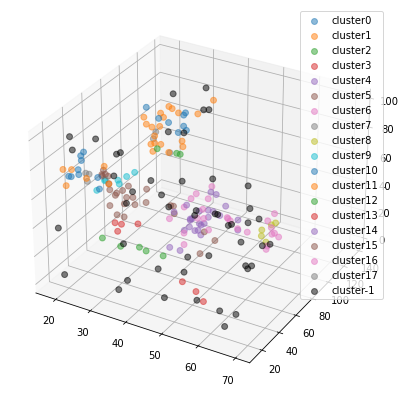

Plot AGE-SCORE before clustering


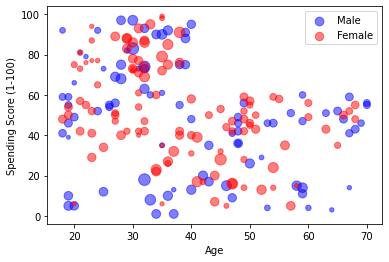

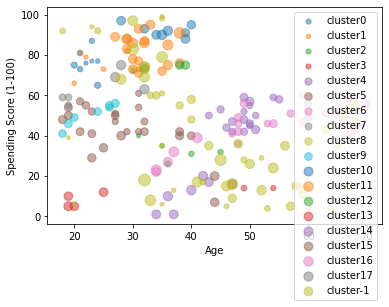

Plot AGE-INCOME before clustering


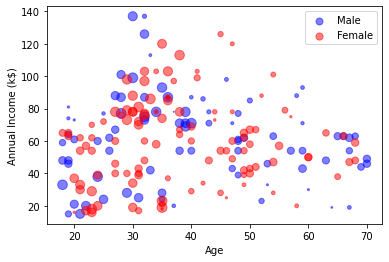

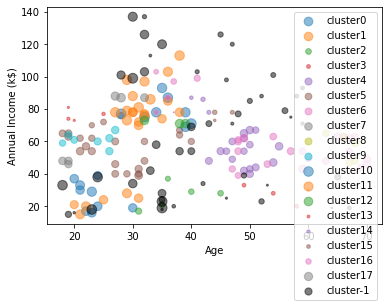

In [25]:
plot_3d("DBSCAN_Clusters", set(labels))
plot("DBSCAN_Clusters", set(labels))